<h1><center><font size=8>AIML - Project 8 - Plant Seedlings Classification</center></font></h1>
<center><img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*roublKDZ3GFtxSVyAZVEcQ.jpeg" width="500" height="400"></center>

# **Plant Seedlings Classification**



### **Context:**
In recent times, the field of agriculture has been in urgent need of modernizing, since the amount of manual work people need to put in to check if plants are growing correctly is still highly extensive. Despite several advances in agricultural technology, people working in the agricultural industry still need to have the ability to sort and recognize different plants and weeds, which takes a lot of time and effort in the long term.

The potential is ripe for this trillion-dollar industry to be greatly impacted by technological innovations that cut down on the requirement for manual labor, and this is where Artificial Intelligence can benefit the workers in this field, as the time and energy required to identify plant seedlings will be greatly shortened by the use of AI and Deep Learning. The ability to do so far more efficiently and even more effectively than experienced manual labor could lead to better crop yields, the freeing up of human involvement for higher-order agricultural decision making, and in the long term will result in more sustainable environmental practices in agriculture as well.

### **Objective:**

Building a Convolutional Neural Network model which would classify the plant seedlings into their respective 12 categories.

### **Data Description:**

**List of Plant species**
 - Black-grass
 - Charlock
 - Cleavers
 - Common Chickweed
 - Common Wheat
 - Fat Hen
 - Loose Silky-bent
 - Maize
 - Scentless Mayweed
 - Shepherds Purse
 - Small-flowered Cranesbill
 - Sugar beet

In [57]:
!pip uninstall tensorflow -y

Found existing installation: tensorflow 2.12.0
Uninstalling tensorflow-2.12.0:
  Successfully uninstalled tensorflow-2.12.0


In [ ]:
!pip install tensorflow

## **Importing the necessary libraries**

In [1]:
import os
import numpy as np                                                                               # Importing numpy for Matrix Operations
import pandas as pd                                                                              # Importing pandas to read CSV files
import matplotlib.pyplot as plt                                                                  # Importting matplotlib for Plotting and visualizing images
import math                                                                                      # Importing math module to perform mathematical operations
import cv2                                                                                       # Importing openCV for image processing
import seaborn as sns                                                                            # Importing seaborn to plot graphs


# Tensorflow modules
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator                              # Importing the ImageDataGenerator for data augmentation
from tensorflow.keras.models import Sequential                                                   # Importing the sequential module to define a sequential model
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization # Defining all the layers to build our CNN Model
from tensorflow.keras.optimizers import Adam,SGD                                                 # Importing the optimizers which can be used in our model
from sklearn import preprocessing                                                                # Importing the preprocessing module to preprocess the data
from sklearn.model_selection import train_test_split                                             # Importing train_test_split function to split the data into train and test
from sklearn.metrics import confusion_matrix                                                     # Importing confusion_matrix to plot the confusion matrix

# Display images using OpenCV
from google.colab.patches import cv2_imshow                                                      # Importing cv2_imshow from google.patches to display images

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## **Reading the dataset**

In [2]:
#Mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load the image file of the dataset
images = np.load('/content/drive/My Drive/Python Learning/Projects/Project8/images.npy')

# Load the labels file of the dataset
labels = pd.read_csv('/content/drive/My Drive/Python Learning/Projects/Project8/Labels.csv')

## **Overview of the dataset**


Printing  shape of the images and labels 

In [62]:
print(images.shape)
print(labels.shape)

(4750, 128, 128, 3)
(4750, 1)


There are 4750 RGB  images of shape 128 x 128 X 3, each image having 3 channels.

## Plotting images using OpenCV and matplotlib

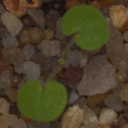

In [63]:
cv2_imshow(images[5])

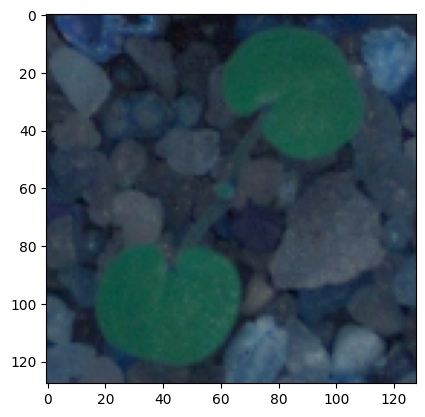

In [64]:
plt.imshow(images[5])

- We can observe that the images are being shown in different colors when plotted with openCV and matplotlib as OpenCV reads images in BGR format and this shows that the given numpy arrays were generated from the original images using OpenCV.
- Now we will convert these BGR images to RGB images so we could interpret them easily.

In [65]:
# Converting the images from BGR to RGB using cvtColor function of OpenCV

for i in range(len(images)):
  images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)

## **Exploratory Data Analysis (EDA)** 

In [66]:
def plot_images(images,labels):
  num_classes=10                                                                  # Number of Classes
  categories=np.unique(labels)   
  keys=dict(labels['Label'])                                                      # Obtaing the unique classes from y_train
  rows = 3                                                                        # Defining number of rows=3
  cols = 4                                                                        # Defining number of columns=4
  fig = plt.figure(figsize=(10, 8))                                               # Defining the figure size to 10x8
  for i in range(cols):
      for j in range(rows):
          random_index = np.random.randint(0, len(labels))                        # Generating random indices from the data and plotting the images
          ax = fig.add_subplot(rows, cols, i * rows + j + 1)                      # Adding subplots with 3 rows and 4 columns
          ax.imshow(images[random_index, :])                                      # Plotting the image 
          ax.set_title(keys[random_index])
  plt.show()

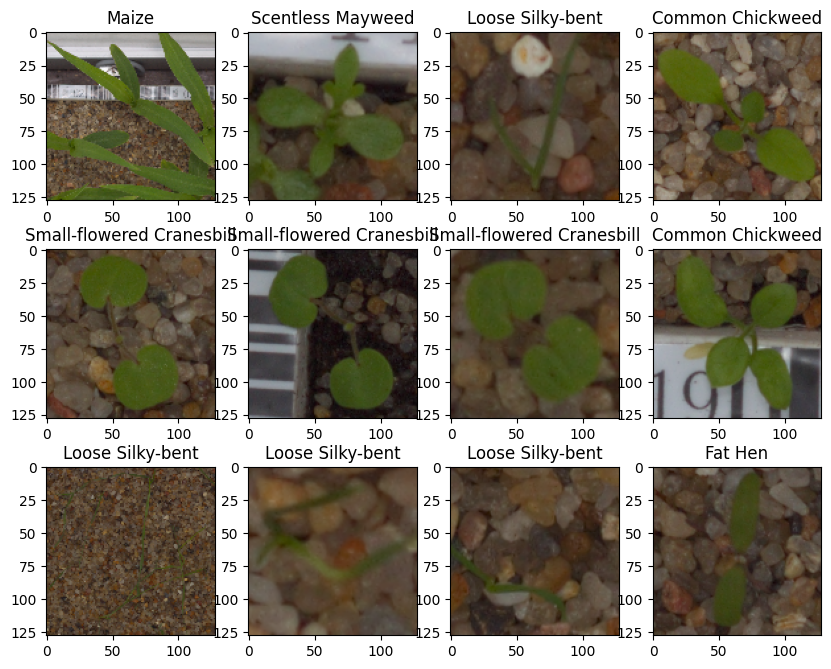

In [67]:
plot_images(images,labels)

<b> Checking for data imbalance

In [68]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

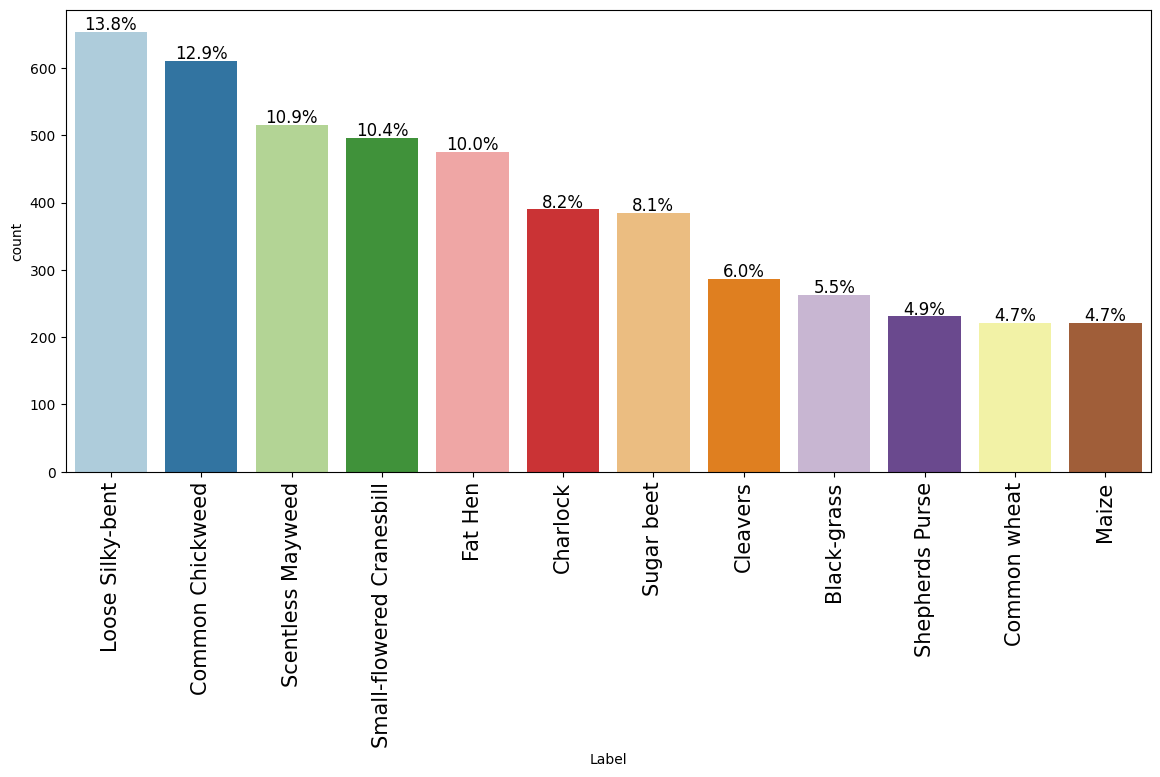

In [69]:
labeled_barplot(labels,'Label',perc=True) 

- As we can see from the above plot, the dataset is not balanced. 
- Few seed types have low representation in data

### Resizing images 
As the size of the images is large, it may be computationally expensive to train on these larger images; therefore, it is preferable to reduce the image size from 128 to 64.

In [70]:
images_decreased=[]
height = 64
width = 64
dimensions = (width, height)  
for i in range(len(images)):
  images_decreased.append( cv2.resize(images[i], dimensions, interpolation=cv2.INTER_LINEAR))

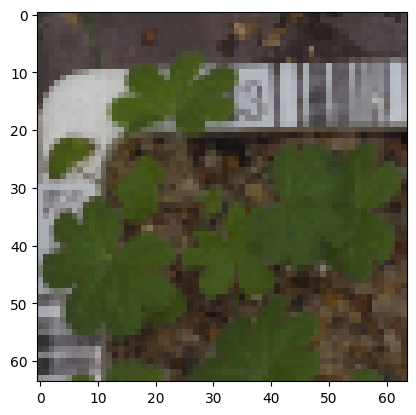

In [71]:
plt.imshow(images_decreased[3])

### Visualizing images using Gaussian Blur 

In [72]:
# Applying Gaussian Blur to denoise the images
images_gb=[]
for i in range(len(images)):
  # gb[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)
  images_gb.append(cv2.GaussianBlur(images[i], ksize =(3,3),sigmaX =  0))


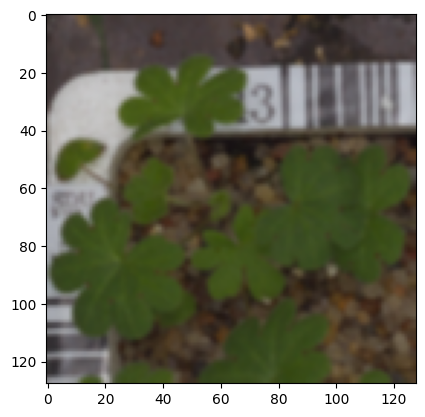

In [73]:
plt.imshow(images_gb[3])

- It appears that GaussianBlur would be ineffective because the blurred or denoised image does not seem to contain any relevant information, and the model would struggle to categorize these blurred images.

###  EDA Summary 

 - There are 4750 RGB images of shape 128 x 128 X 3, each image having 3 channels.
 - Images are being shown in different colors when plotted with openCV and matplotlib as OpenCV reads images in BGR format and this shows that the given numpy arrays were generated from the original images using OpenCV.
 - The dataset is not balanced.Maize, Common Wheat, Sheperds Purse, Black-Gras, Cleavers has 6% or less in data representation. 
 - As the size of the images is large, it may be computationally expensive to train on these larger images; therefore, it is preferable to reduce the image size from 128 to 64.
 - GaussianBlur would be ineffective because the blurred or denoised image does not seem to contain any relevant information, and the model may struggle to categorize these blurred images.

##  Data Processing  

### **Splitting the dataset**

- As we have less images in our dataset, we will only use 10% of our data for testing, 10% of our data for validation and 80% of our data for training.
- We are using the train_test_split() function from scikit-learn. Here, we split the dataset into three parts, train,test and validation.


In [74]:
from sklearn.model_selection import train_test_split
X_temp, X_test, y_temp, y_test = train_test_split(np.array(images_decreased),labels , test_size=0.1, random_state=1,stratify=labels)
X_train, X_val, y_train, y_val = train_test_split(X_temp,y_temp , test_size=0.1, random_state=1,stratify=y_temp)


In [75]:
print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)
print(X_test.shape,y_test.shape)

(3847, 64, 64, 3) (3847, 1)
(428, 64, 64, 3) (428, 1)
(475, 64, 64, 3) (475, 1)


### **Fixing imbalance**

increasing the weights of the minority classes.

In [76]:
from sklearn.utils import class_weight

labelList = labels.Label.unique()
class_weights = class_weight.compute_class_weight(class_weight = "balanced",
                                                  classes = np.array(labelList),
                                                  y = y_train.values.reshape(-1)
                                                  )
class_weights = dict(zip(np.array(range(len(labelList))), class_weights))
#print calculated class weights
class_weights

{0: 0.7974709784411277,
 1: 0.8348524305555556,
 2: 1.714349376114082,
 3: 1.7909683426443204,
 4: 0.6476430976430977,
 5: 1.0145042194092826,
 6: 1.3818247126436782,
 7: 0.7669457735247209,
 8: 1.0275106837606838,
 9: 1.7909683426443204,
 10: 1.5050860719874803,
 11: 0.604874213836478}

### **Making the data compatible:**

- Convert labels from names to one hot vectors
- Normalizing the values


### Encoding the target labels

In [77]:
# Convert labels from names to one hot vectors.
# We have already used encoding methods like onehotencoder and labelencoder earlier so now we will be using a new encoding method called labelBinarizer.
# Labelbinarizer works similar to onehotencoder 

from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y_train_encoded = enc.fit_transform(y_train)
y_val_encoded=enc.transform(y_val)
y_test_encoded=enc.transform(y_test)

### Data Normalization
Since the **image pixel values range from 0-255**, our method of normalization here will be **scaling** - we shall **divide all the pixel values by 255 to standardize the images to have values between 0-1.**

In [78]:
# Normalizing the image pixels
X_train_normalized = X_train.astype('float32')/255.0
X_val_normalized = X_val.astype('float32')/255.0
X_test_normalized = X_test.astype('float32')/255.0


## **Model Building - Convolutional Neural Network (CNN)**
Let's create a CNN model sequentially, where we will be adding the layers one after another.

### **Model0 - CNN - No BatchNormalization or Dropout**

Clearing the previous model's history from the session even if a single model can run multiple times on the same data. 

Fixing the seed again after clearing the backend.

**setting the seed for random number generators in Numpy, the Random library in Python, and in TensorFlow** to be able to reproduce the same results every time we run the code.

In [79]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [80]:
import random
np.random.seed(1)
random.seed(1)
tf.random.set_seed(1)

Now, let's build a **CNN Model** with the following 2 main parts - <br>

1. **The Feature Extraction layers** which are comprised of convolutional and pooling layers.
2. **The Fully Connected classification layers** for prediction.<br>
3. **So, the first and most important rule is: don't place a Batch Normalization after a Dropout (or a SpatialDropout).
Usually,  try to leave at least two convolutional/dense layers without any dropout before applying a batch normalization, to avoid this**<br>


In [81]:
# Intializing a sequential model
model_CNN0 = Sequential()

# Adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of images
model_CNN0.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))
# Adding max pooling to reduce the size of output of first conv layer
model_CNN0.add(MaxPooling2D((2, 2), padding = 'same'))

model_CNN0.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model_CNN0.add(MaxPooling2D((2, 2), padding = 'same'))


# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model_CNN0.add(Flatten())

# Adding a fully connected dense layer with 16 neurons    
model_CNN0.add(Dense(16, activation='relu'))


# Adding the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem  
model_CNN0.add(Dense(12, activation='softmax'))

# Using SGD Optimizer
# opt = SGD(learning_rate=0.01, momentum=0.9)
opt=Adam()
# Compile model
model_CNN0.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model_CNN0.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 16)                1

#### <b> Fitting the model on the train data

In [82]:
history_model_CNN0= model_CNN0.fit(
            X_train_normalized, y_train_encoded,
            epochs=20,
            validation_data=(X_val_normalized,y_val_encoded),
            batch_size=32,
            verbose=2
)

Epoch 1/20
121/121 - 3s - loss: 2.3976 - accuracy: 0.1391 - val_loss: 2.2744 - val_accuracy: 0.2196 - 3s/epoch - 24ms/step
Epoch 2/20
121/121 - 1s - loss: 2.0424 - accuracy: 0.3483 - val_loss: 1.9523 - val_accuracy: 0.3411 - 848ms/epoch - 7ms/step
Epoch 3/20
121/121 - 1s - loss: 1.6522 - accuracy: 0.4273 - val_loss: 1.6039 - val_accuracy: 0.4439 - 928ms/epoch - 8ms/step
Epoch 4/20
121/121 - 1s - loss: 1.4363 - accuracy: 0.4991 - val_loss: 1.4080 - val_accuracy: 0.5234 - 876ms/epoch - 7ms/step
Epoch 5/20
121/121 - 1s - loss: 1.2877 - accuracy: 0.5532 - val_loss: 1.2563 - val_accuracy: 0.5981 - 762ms/epoch - 6ms/step
Epoch 6/20
121/121 - 1s - loss: 1.1898 - accuracy: 0.5786 - val_loss: 1.3566 - val_accuracy: 0.5537 - 680ms/epoch - 6ms/step
Epoch 7/20
121/121 - 1s - loss: 1.1542 - accuracy: 0.5945 - val_loss: 1.2711 - val_accuracy: 0.6145 - 698ms/epoch - 6ms/step
Epoch 8/20
121/121 - 1s - loss: 1.0953 - accuracy: 0.6088 - val_loss: 1.1744 - val_accuracy: 0.6262 - 706ms/epoch - 6ms/step
Ep

#### **Model Evaluation**

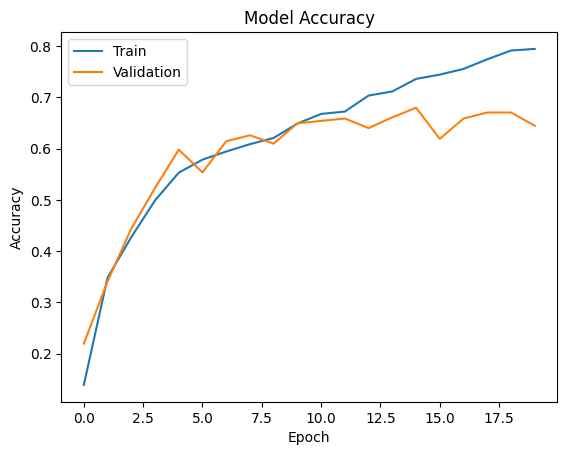

In [83]:
plt.plot(history_model_CNN0.history['accuracy'])
plt.plot(history_model_CNN0.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

#### **Evaluating the model on test data**

In [84]:
accuracy = model_CNN0.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 0s - loss: 1.2519 - accuracy: 0.6063 - 76ms/epoch - 5ms/step


#### **Generating the predictions using test data**

In [87]:
# Here we would get the output as probablities for each category
y_pred_model_CNN0=model_CNN0.predict(X_test_normalized)

15/15 [==============================] - 0s 3ms/step


In [88]:
y_pred_model_CNN0

array([[2.96336436e-03, 9.75434418e-08, 2.56504893e-04, ...,
        3.52335558e-03, 5.62083274e-02, 2.74874065e-02],
       [2.83431147e-16, 9.51772749e-01, 2.01812629e-02, ...,
        5.46422089e-03, 2.25462765e-02, 1.16194542e-06],
       [5.08784069e-05, 1.10089729e-06, 5.34258834e-05, ...,
        4.39118035e-03, 2.58062471e-04, 2.63953186e-03],
       ...,
       [1.25768045e-08, 7.30726063e-01, 2.59763241e-01, ...,
        4.05171840e-03, 5.71634271e-04, 4.18719974e-05],
       [1.60185212e-10, 1.13679971e-05, 1.81039880e-07, ...,
        7.10291788e-02, 6.08969771e-04, 1.70266212e-04],
       [4.17945348e-02, 4.13466551e-05, 2.37234067e-02, ...,
        3.99377150e-03, 1.70162195e-04, 1.04973316e-01]], dtype=float32)

#### **Plotting the Confusion Matrix**

*   The Confusion matrix is also defined as an inbuilt function in the TensorFlow module, so we can use that for evaluating the classification model.
*   The Confusion matrix expects categorical data as input. However, y_test_encoded is an encoded value, whereas y_pred has probabilities. So,we must retrieve the categorical values from the encoded values.
*   We will use the `argmax()` function to obtain the maximum value over each category on both y_test_encoded and y_pred and obtain their respective classes.





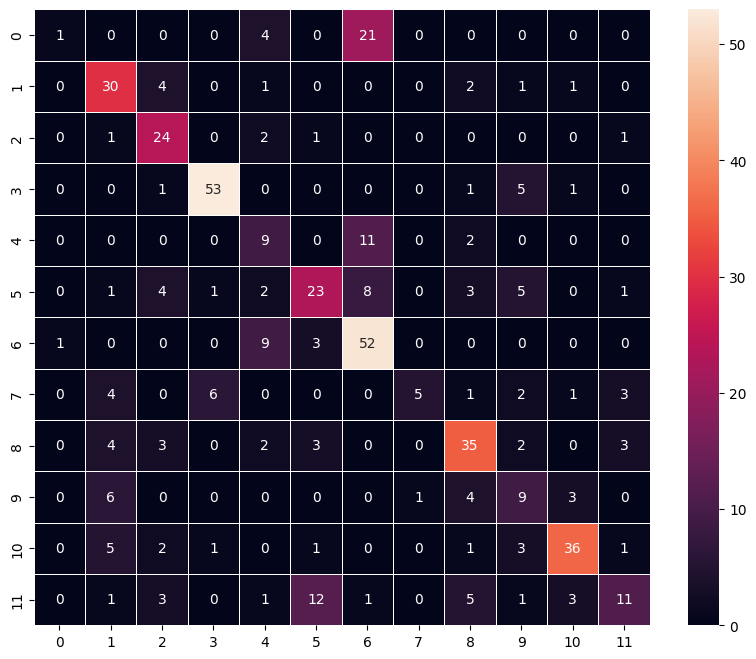

In [89]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg_CNN0=np.argmax(y_pred_model_CNN0,axis=1)
y_test_arg_CNN0=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg_CNN0,y_pred_arg_CNN0)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

In [90]:
#Accuracy as per the classification report 
from sklearn import metrics
cr=metrics.classification_report(y_test_arg_CNN0,y_pred_arg_CNN0)
print(cr)

              precision    recall  f1-score   support

           0       0.50      0.04      0.07        26
           1       0.58      0.77      0.66        39
           2       0.59      0.83      0.69        29
           3       0.87      0.87      0.87        61
           4       0.30      0.41      0.35        22
           5       0.53      0.48      0.51        48
           6       0.56      0.80      0.66        65
           7       0.83      0.23      0.36        22
           8       0.65      0.67      0.66        52
           9       0.32      0.39      0.35        23
          10       0.80      0.72      0.76        50
          11       0.55      0.29      0.38        38

    accuracy                           0.61       475
   macro avg       0.59      0.54      0.53       475
weighted avg       0.62      0.61      0.58       475



#### Observations</b><br>
- This model has 79% accuracy on training data Vs around 64% accuracy on validation and 61% on test data. This indicates that model is overfitting.
- We observe that some of the classes are not predicted correctly. 
- In comparison to the rest, we can see that classes 3 and 8 are well classified.
- We can also observe that classes 5,11,0 and 6 are mostly misclassified.

### **Model1 - CNN - 64 filters - BatchNormalization and Dropout**

In [91]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [92]:
# Fixing the seed for random number generators
import random
np.random.seed(1)
random.seed(1)
tf.random.set_seed(1)

In [93]:
# Intializing a sequential model
model_CNN1 = Sequential()

# Adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of images
model_CNN1.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))
# Adding max pooling to reduce the size of output of first conv layer
model_CNN1.add(MaxPooling2D((2, 2), padding = 'same'))

model_CNN1.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model_CNN1.add(MaxPooling2D((2, 2), padding = 'same'))
model_CNN1.add(BatchNormalization())

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model_CNN1.add(Flatten())

# Adding a fully connected dense layer with 16 neurons    
model_CNN1.add(Dense(16, activation='relu'))
model_CNN1.add(Dropout(0.2))

# Adding the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem  
model_CNN1.add(Dense(12, activation='softmax'))

# Using SGD Optimizer
# opt = SGD(learning_rate=0.01, momentum=0.9)
opt=Adam()
# Compile model
model_CNN1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model_CNN1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization (BatchN  (None, 16, 16, 32)       128       
 ormalization)                                                   
                                                        

#### <b> Fitting the model on the train data

In [94]:
history_model_CNN1= model_CNN1.fit(
            X_train_normalized, y_train_encoded,
            epochs=20,
            validation_data=(X_val_normalized,y_val_encoded),
            batch_size=32,
            verbose=2
)

Epoch 1/20
121/121 - 7s - loss: 1.9672 - accuracy: 0.3200 - val_loss: 2.2479 - val_accuracy: 0.3995 - 7s/epoch - 55ms/step
Epoch 2/20
121/121 - 1s - loss: 1.3927 - accuracy: 0.5209 - val_loss: 1.9693 - val_accuracy: 0.4930 - 1s/epoch - 9ms/step
Epoch 3/20
121/121 - 1s - loss: 1.1902 - accuracy: 0.5896 - val_loss: 1.5717 - val_accuracy: 0.5093 - 1s/epoch - 9ms/step
Epoch 4/20
121/121 - 1s - loss: 1.0614 - accuracy: 0.6176 - val_loss: 1.5938 - val_accuracy: 0.4369 - 1s/epoch - 9ms/step
Epoch 5/20
121/121 - 1s - loss: 0.9717 - accuracy: 0.6623 - val_loss: 1.5886 - val_accuracy: 0.4907 - 708ms/epoch - 6ms/step
Epoch 6/20
121/121 - 1s - loss: 0.8660 - accuracy: 0.6886 - val_loss: 1.0319 - val_accuracy: 0.6542 - 732ms/epoch - 6ms/step
Epoch 7/20
121/121 - 1s - loss: 0.7866 - accuracy: 0.7242 - val_loss: 1.1206 - val_accuracy: 0.6332 - 854ms/epoch - 7ms/step
Epoch 8/20
121/121 - 1s - loss: 0.6866 - accuracy: 0.7658 - val_loss: 1.0203 - val_accuracy: 0.6893 - 865ms/epoch - 7ms/step
Epoch 9/20


#### **Model Evaluation**

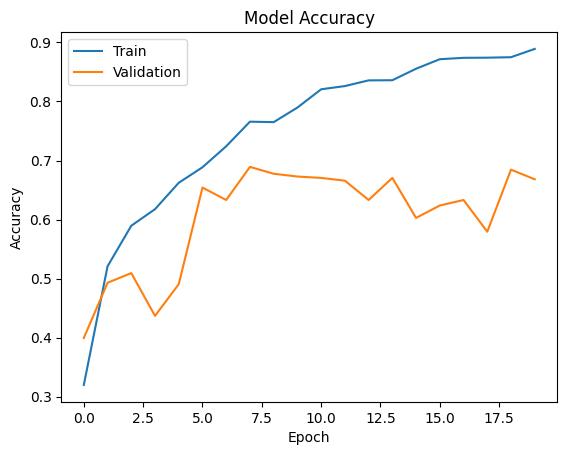

In [95]:
plt.plot(history_model_CNN1.history['accuracy'])
plt.plot(history_model_CNN1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Observations:** 


*   We can see from the above plot that **the training accuracy of the  model was good but the validation accuracy was not good.**
*   The model seems to overfit on the data.






#### **Evaluating the model on test data**

In [96]:
accuracy = model_CNN1.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 0s - loss: 1.5425 - accuracy: 0.6589 - 89ms/epoch - 6ms/step


#### **Generating the predictions using test data**

In [97]:
# Here we would get the output as probablities for each category
y_pred_model_CNN1=model_CNN1.predict(X_test_normalized)

15/15 [==============================] - 0s 3ms/step


In [98]:
y_pred_model_CNN1

array([[1.7128863e-05, 6.5171715e-11, 1.6429393e-09, ..., 9.0347250e-08,
        8.4558308e-02, 3.1290278e-03],
       [7.1216432e-13, 4.3840359e-06, 6.9294049e-07, ..., 1.0914322e-04,
        9.9967086e-01, 1.6189362e-04],
       [1.4634879e-05, 4.4112509e-12, 3.3364238e-12, ..., 3.0824424e-07,
        3.6828574e-06, 1.0751422e-05],
       ...,
       [7.7804572e-09, 9.7573197e-01, 5.3063994e-03, ..., 2.1930600e-09,
        6.2065342e-06, 5.9019090e-03],
       [5.3231264e-13, 6.4913950e-15, 5.6726430e-14, ..., 2.8436906e-03,
        1.6101081e-05, 2.8010747e-06],
       [1.7966565e-02, 7.0110788e-03, 9.6513502e-02, ..., 5.1571522e-04,
        5.9630262e-04, 1.2229215e-01]], dtype=float32)

#### **Plotting the Confusion Matrix**

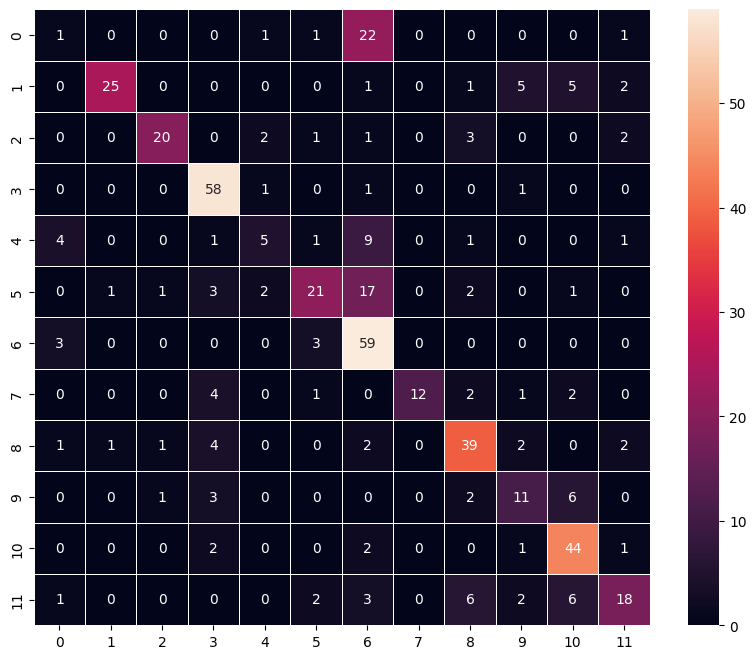

In [99]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg_CNN1=np.argmax(y_pred_model_CNN1,axis=1)
y_test_arg_CNN1=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg_CNN1,y_pred_arg_CNN1)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

In [100]:
#Accuracy as per the classification report 
from sklearn import metrics
cr=metrics.classification_report(y_test_arg_CNN1,y_pred_arg_CNN1)
print(cr)

              precision    recall  f1-score   support

           0       0.10      0.04      0.06        26
           1       0.93      0.64      0.76        39
           2       0.87      0.69      0.77        29
           3       0.77      0.95      0.85        61
           4       0.45      0.23      0.30        22
           5       0.70      0.44      0.54        48
           6       0.50      0.91      0.65        65
           7       1.00      0.55      0.71        22
           8       0.70      0.75      0.72        52
           9       0.48      0.48      0.48        23
          10       0.69      0.88      0.77        50
          11       0.67      0.47      0.55        38

    accuracy                           0.66       475
   macro avg       0.65      0.58      0.60       475
weighted avg       0.67      0.66      0.64       475



#### Observations</b><br>
- This model has 88% accuracy on training data Vs around 66% accuracy on validation and 66% on test data. This indicates that model is still overfitting to some extent and still have lower validation and test accuracy.
- We observe that some of the classes are not predicted correctly. 
- In comparison to the rest, we can see that classes 1,2,3 and 10 are well classified.
- We can also observe that classes 6 is mostly misclassified.

## **Model Performance Improvement**

### **Model2 - Data Augmentation - CNN - 64 filters - BatchNormalization and Dropout**



As we can see, our initial model appears to overfit. Therefore we'll try to address this problem with data augmentation and Batch Normalization to check if we can improve the model's performance.

#### **Data Augmentation**

In most of the real-world case studies, it is challenging to acquire a large number of images and then train CNNs. To overcome this problem, one approach we might consider is **Data Augmentation**. CNNs have the property of **translational invariance**, which means they can recognise an object even if its appearance shifts translationally in some way. <br> Taking this attribute into account, we can augment the images using the techniques listed below - <br>
**1. Horizontal Flip** (should be set to True/False) <br>
**2. Vertical Flip** (should be set to True/False) <br>
**3. Height Shift** (should be between 0 and 1) <br>
**4. Width Shift** (should be between 0 and 1) <br>
**5. Rotation** (should be between 0 and 180) <br>
**6. Shear** (should be between 0 and 1) <br>
**7. Zoom** (should be between 0 and 1) etc. <br>

Remember, **data augmentation should not be used in the validation/test data set**.

In [101]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators
import random
np.random.seed(1)
random.seed(1)
tf.random.set_seed(1)

In [102]:
# All images to be rescaled by 1/255.
train_datagen = ImageDataGenerator(
                              rotation_range=20, 
                              fill_mode='nearest'
                              )
# test_datagen  = ImageDataGenerator(rescale = 1.0/255.)

# No using ecplicite parameters to Augemnt data. This gave low performance to model. 

# train_datagen = ImageDataGenerator(rescale=1. / 255.0,
#                               horizontal_flip = True,
#                               vertical_flip = False, 
#                               height_shift_range= 0.1, 
#                               width_shift_range=0.1, 
#                               rotation_range=20, 
#                               shear_range = 0.1,
#                               zoom_range=0.1)

In [103]:
# Intializing a sequential model
model_CNN2 = Sequential()

# Adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of images
model_CNN2.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))
# Adding max pooling to reduce the size of output of first conv layer
model_CNN2.add(MaxPooling2D((2, 2), padding = 'same'))

model_CNN2.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model_CNN2.add(MaxPooling2D((2, 2), padding = 'same'))
model_CNN2.add(BatchNormalization())

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model_CNN2.add(Flatten())

# Adding a fully connected dense layer with 16 neurons    
model_CNN2.add(Dense(16, activation='relu'))
model_CNN2.add(Dropout(0.2))

# Adding the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem  
model_CNN2.add(Dense(12, activation='softmax'))

# Using SGD Optimizer
# opt = SGD(learning_rate=0.01, momentum=0.9)
opt=Adam()
# Compile model
model_CNN2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model_CNN2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization (BatchN  (None, 16, 16, 32)       128       
 ormalization)                                                   
                                                        

In [104]:
# Epochs
epochs = 20
# Batch size
batch_size = 32

model_CNN2_history = model_CNN2.fit(train_datagen.flow(X_train_normalized,y_train_encoded,
                                       batch_size=batch_size, 
                                       seed=1,
                                       shuffle=False),
                    epochs=epochs,
                    steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                    validation_data=(X_val_normalized,y_val_encoded),
                    verbose=1)

Epoch 1/20
120/120 [==============================] - 7s 45ms/step - loss: 1.9942 - accuracy: 0.3088 - val_loss: 2.2904 - val_accuracy: 0.3785
Epoch 2/20
120/120 [==============================] - 5s 38ms/step - loss: 1.5050 - accuracy: 0.4637 - val_loss: 2.0797 - val_accuracy: 0.3785
Epoch 3/20
120/120 [==============================] - 5s 44ms/step - loss: 1.3103 - accuracy: 0.5342 - val_loss: 1.8919 - val_accuracy: 0.4042
Epoch 4/20
120/120 [==============================] - 6s 48ms/step - loss: 1.1745 - accuracy: 0.5919 - val_loss: 1.4125 - val_accuracy: 0.6542
Epoch 5/20
120/120 [==============================] - 5s 44ms/step - loss: 1.0897 - accuracy: 0.6186 - val_loss: 1.2046 - val_accuracy: 0.5748
Epoch 6/20
120/120 [==============================] - 6s 48ms/step - loss: 0.9995 - accuracy: 0.6495 - val_loss: 1.0224 - val_accuracy: 0.6822
Epoch 7/20
120/120 [==============================] - 4s 37ms/step - loss: 0.9527 - accuracy: 0.6629 - val_loss: 2.1717 - val_accuracy: 0.3762

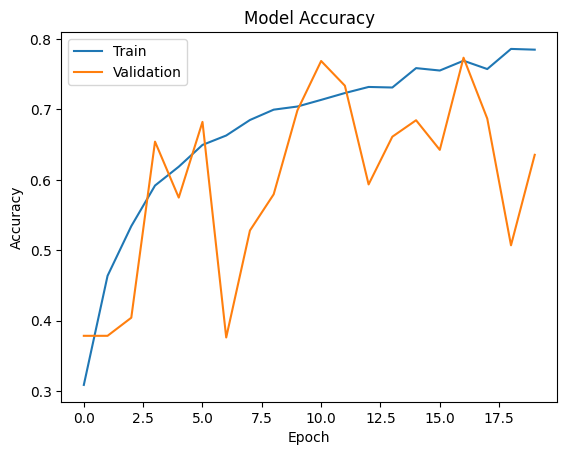

In [106]:
plt.plot(model_CNN2_history.history['accuracy'])
plt.plot(model_CNN2_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [107]:
accuracy = model_CNN2.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 0s - loss: 1.0716 - accuracy: 0.6800 - 90ms/epoch - 6ms/step


We can observe that our accuracy has improved compared to our previous model.

In [108]:
# Here we would get the output as probablities for each category
y_pred_CNN2=model_CNN2.predict(X_test_normalized)

15/15 [==============================] - 0s 3ms/step


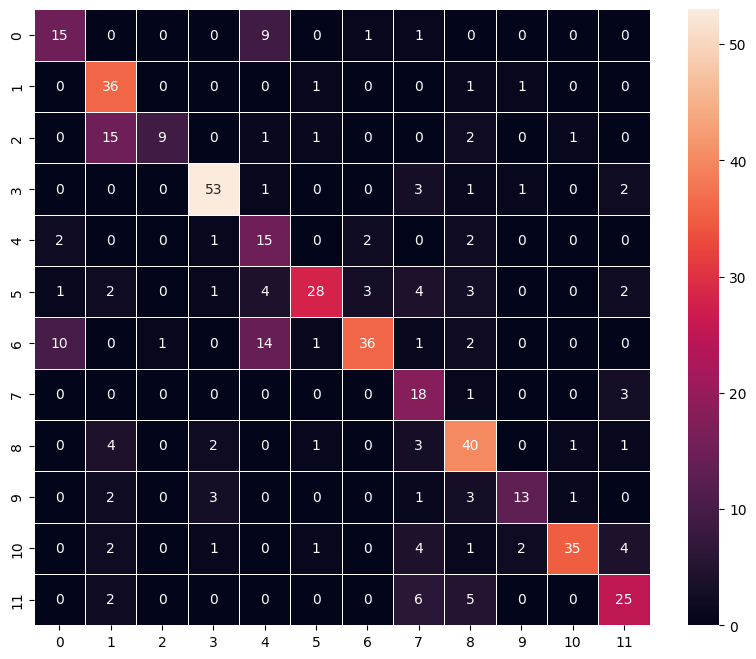

In [109]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg_CNN2=np.argmax(y_pred_CNN2,axis=1)
y_test_arg_CNN2=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg_CNN2,y_pred_arg_CNN2)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

In [110]:
#Accuracy as per the classification report 
from sklearn import metrics
cr=metrics.classification_report(y_test_arg_CNN2,y_pred_arg_CNN2)
print(cr)

              precision    recall  f1-score   support

           0       0.54      0.58      0.56        26
           1       0.57      0.92      0.71        39
           2       0.90      0.31      0.46        29
           3       0.87      0.87      0.87        61
           4       0.34      0.68      0.45        22
           5       0.85      0.58      0.69        48
           6       0.86      0.55      0.67        65
           7       0.44      0.82      0.57        22
           8       0.66      0.77      0.71        52
           9       0.76      0.57      0.65        23
          10       0.92      0.70      0.80        50
          11       0.68      0.66      0.67        38

    accuracy                           0.68       475
   macro avg       0.70      0.67      0.65       475
weighted avg       0.74      0.68      0.68       475



#### Observations</b><br>
- This model has 79% accuracy on training data Vs around 64% accuracy on validation and 68% on test data. This indicates that model is not overfitting now and test accurancy is significantly better than other 2 models. 
- We observe that some of the classes are not predicted correctly. 
- We still observe that classes 6 is mostly misclassified.

### **2_1 - Data Augmentation - More Neurons - CNN - 128 filters - BatchNormalization and Dropout**

In [111]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators
import random
np.random.seed(1)
random.seed(1)
tf.random.set_seed(1)

In [112]:
# Intializing a sequential model
model_CNN2_1 = Sequential()

# Adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of images
model_CNN2_1.add(Conv2D(128, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))
# Adding max pooling to reduce the size of output of first conv layer
model_CNN2_1.add(MaxPooling2D((2, 2), padding = 'same'))

model_CNN2_1.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model_CNN2_1.add(MaxPooling2D((2, 2), padding = 'same'))
model_CNN2_1.add(BatchNormalization())

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model_CNN2_1.add(Flatten())

# Adding a fully connected dense layer with 16 neurons    
model_CNN2_1.add(Dense(16, activation='relu'))
model_CNN2_1.add(Dropout(0.2))

# Adding the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem  
model_CNN2_1.add(Dense(12, activation='softmax'))

# Using SGD Optimizer
# opt = SGD(learning_rate=0.01, momentum=0.9)
opt=Adam()
# Compile model
model_CNN2_1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model_CNN2_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 batch_normalization (BatchN  (None, 16, 16, 64)       256       
 ormalization)                                                   
                                                        

In [113]:
# Epochs
epochs = 20
# Batch size
batch_size = 32

model_CNN2__1_history = model_CNN2_1.fit(train_datagen.flow(X_train_normalized,y_train_encoded,
                                       batch_size=batch_size, 
                                       seed=1,
                                       shuffle=False),
                    epochs=epochs,
                    steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                    validation_data=(X_val_normalized,y_val_encoded),
                    verbose=1)

Epoch 1/20
120/120 [==============================] - 9s 57ms/step - loss: 1.9511 - accuracy: 0.3253 - val_loss: 2.3303 - val_accuracy: 0.0935
Epoch 2/20
120/120 [==============================] - 5s 41ms/step - loss: 1.4870 - accuracy: 0.4896 - val_loss: 2.0838 - val_accuracy: 0.3995
Epoch 3/20
120/120 [==============================] - 5s 38ms/step - loss: 1.2819 - accuracy: 0.5623 - val_loss: 1.6571 - val_accuracy: 0.5070
Epoch 4/20
120/120 [==============================] - 7s 58ms/step - loss: 1.1685 - accuracy: 0.5945 - val_loss: 1.3970 - val_accuracy: 0.5818
Epoch 5/20
120/120 [==============================] - 5s 39ms/step - loss: 1.0716 - accuracy: 0.6265 - val_loss: 0.9395 - val_accuracy: 0.7220
Epoch 6/20
120/120 [==============================] - 8s 67ms/step - loss: 1.0145 - accuracy: 0.6427 - val_loss: 1.0860 - val_accuracy: 0.6472
Epoch 7/20
120/120 [==============================] - 5s 45ms/step - loss: 0.9334 - accuracy: 0.6708 - val_loss: 4.3181 - val_accuracy: 0.1612

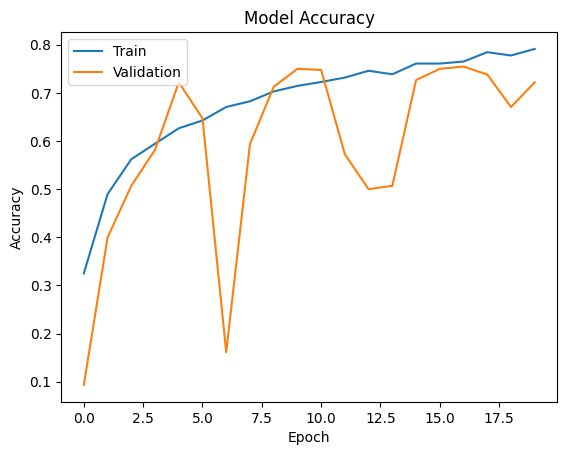

In [114]:
plt.plot(model_CNN2__1_history.history['accuracy'])
plt.plot(model_CNN2__1_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [115]:
accuracy = model_CNN2_1.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 0s - loss: 0.9369 - accuracy: 0.7305 - 84ms/epoch - 6ms/step


In [116]:
# Here we would get the output as probablities for each category
y_pred_CNN2_1=model_CNN2_1.predict(X_test_normalized)

15/15 [==============================] - 0s 5ms/step


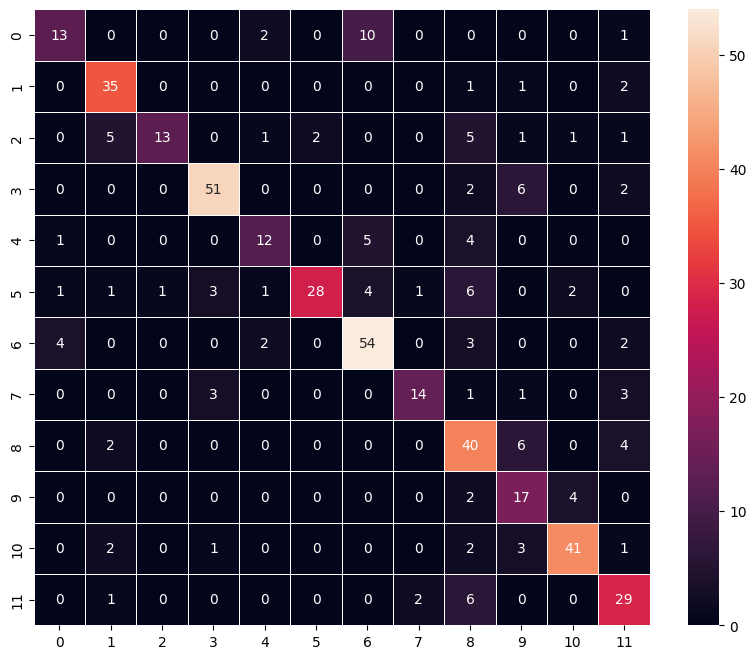

In [117]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg_CNN2_1=np.argmax(y_pred_CNN2_1,axis=1)
y_test_arg_CNN2_1=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg_CNN2_1,y_pred_arg_CNN2_1)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

In [118]:
#Accuracy as per the classification report 
from sklearn import metrics
cr=metrics.classification_report(y_test_arg_CNN2_1,y_pred_arg_CNN2_1)
print(cr)

              precision    recall  f1-score   support

           0       0.68      0.50      0.58        26
           1       0.76      0.90      0.82        39
           2       0.93      0.45      0.60        29
           3       0.88      0.84      0.86        61
           4       0.67      0.55      0.60        22
           5       0.93      0.58      0.72        48
           6       0.74      0.83      0.78        65
           7       0.82      0.64      0.72        22
           8       0.56      0.77      0.65        52
           9       0.49      0.74      0.59        23
          10       0.85      0.82      0.84        50
          11       0.64      0.76      0.70        38

    accuracy                           0.73       475
   macro avg       0.75      0.70      0.70       475
weighted avg       0.76      0.73      0.73       475



#### Observations</b><br>
- This model has 79% accuracy on training data Vs around 72% accuracy on validation and 73% on test data. This indicates that model is not overfitting. 
- We observe that few classes are not predicted correctly compared to other models. 
- We still observe that classes 6 is mostly misclassified.


###Model3 - Transfer Learning using VGG16

- Let's try again, but this time, we will be using the idea of **Transfer Learning**. We will be loading a pre-built architecture - **VGG16**, which was trained on the ImageNet dataset and is the runner-up in the ImageNet competition in 2014.

- For training VGG16, we will directly use the convolutional and pooling layers and freeze their weights i.e. no training will be done on them. For classification, we will replace the existing fully-connected layers with FC layers created specifically for our problem.


![vgg16](https://upload.wikimedia.org/wikipedia/commons/2/24/VGG16.png)

In [119]:
from tensorflow.keras.models import Model
from keras.applications.vgg16 import VGG16

vgg_model = VGG16(weights='imagenet', include_top = False, input_shape = (64,64,3))
vgg_model.summary()

58889256/58889256 [==============================] - 3s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                              

In [120]:
# Making all the layers of the VGG model non-trainable. i.e. freezing them
for layer in vgg_model.layers:
    layer.trainable = False

In [121]:
model_CNN3 = Sequential()

# Adding the convolutional part of the VGG16 model from above
model_CNN3.add(vgg_model)

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model_CNN3.add(Flatten())

# Adding a fully connected dense layer with 16 neurons    
model_CNN3.add(Dense(16, activation='relu'))
model_CNN3.add(Dropout(0.2))

# Adding the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem  
model_CNN3.add(Dense(12, activation='softmax'))

# Using SGD Optimizer
# opt = SGD(learning_rate=0.01, momentum=0.9)
opt=Adam()
# Compile model
model_CNN3.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model_CNN3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 16)                32784     
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_3 (Dense)             (None, 12)                204       
                                                                 
Total params: 14,747,676
Trainable params: 32,988
Non-trainable params: 14,714,688
_________________________________________________________________


In [122]:
# Epochs
epochs = 20
# Batch size
batch_size = 32

history_vgg16 = model_CNN3.fit(train_datagen.flow(X_train_normalized,y_train_encoded,
                                       batch_size=batch_size, 
                                       seed=1,
                                       shuffle=False),
                    epochs=epochs,
                    steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                    validation_data=(X_val_normalized,y_val_encoded),
                    verbose=1)

Epoch 1/20
120/120 [==============================] - 14s 98ms/step - loss: 2.3658 - accuracy: 0.1748 - val_loss: 2.2330 - val_accuracy: 0.2593
Epoch 2/20
120/120 [==============================] - 5s 40ms/step - loss: 2.1049 - accuracy: 0.2975 - val_loss: 1.9431 - val_accuracy: 0.3832
Epoch 3/20
120/120 [==============================] - 7s 56ms/step - loss: 1.9415 - accuracy: 0.3284 - val_loss: 1.8125 - val_accuracy: 0.3949
Epoch 4/20
120/120 [==============================] - 5s 40ms/step - loss: 1.8423 - accuracy: 0.3667 - val_loss: 1.6804 - val_accuracy: 0.4299
Epoch 5/20
120/120 [==============================] - 5s 40ms/step - loss: 1.7664 - accuracy: 0.3733 - val_loss: 1.6052 - val_accuracy: 0.4463
Epoch 6/20
120/120 [==============================] - 7s 59ms/step - loss: 1.7004 - accuracy: 0.4031 - val_loss: 1.5629 - val_accuracy: 0.4766
Epoch 7/20
120/120 [==============================] - 5s 43ms/step - loss: 1.6636 - accuracy: 0.4084 - val_loss: 1.5285 - val_accuracy: 0.476

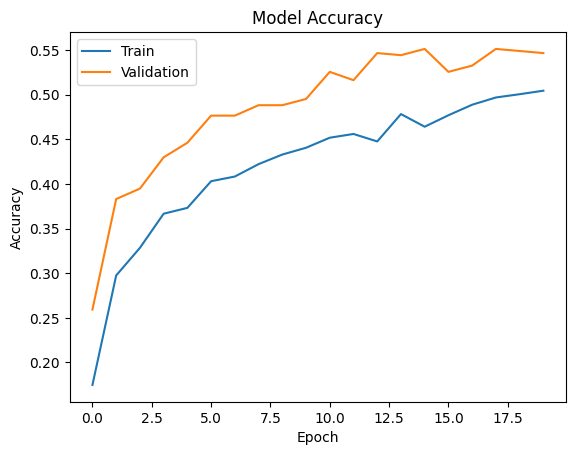

In [123]:
plt.plot(history_vgg16.history['accuracy'])
plt.plot(history_vgg16.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [124]:
accuracy = model_CNN3.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 1s - loss: 1.3002 - accuracy: 0.5663 - 821ms/epoch - 55ms/step


In [125]:
# Here we would get the output as probablities for each category
y_pred_CNN3=model_CNN3.predict(X_test_normalized)

15/15 [==============================] - 0s 20ms/step


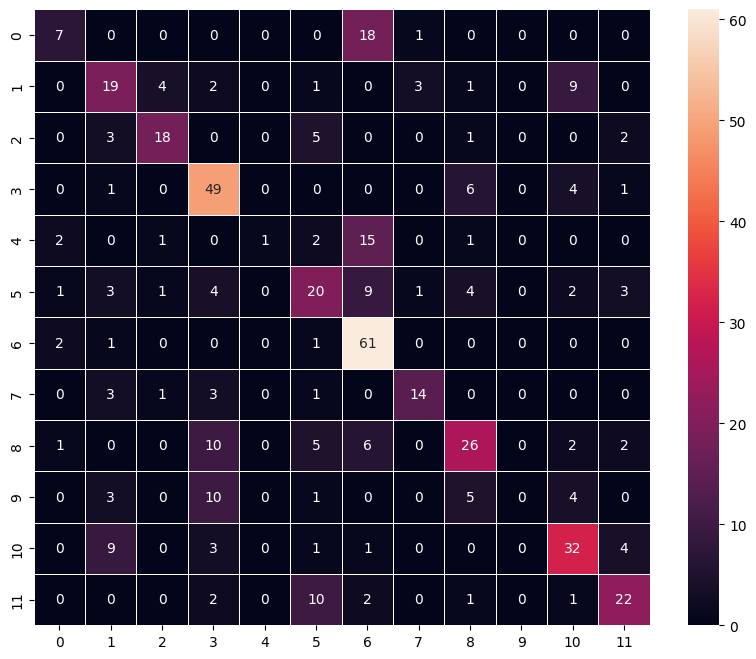

In [126]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg_CNN3=np.argmax(y_pred_CNN3,axis=1)
y_test_arg_CNN3=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg_CNN3,y_pred_arg_CNN3)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

In [127]:
#Accuracy as per the classification report 
from sklearn import metrics
cr=metrics.classification_report(y_test_arg_CNN3,y_pred_arg_CNN3)
print(cr)

              precision    recall  f1-score   support

           0       0.54      0.27      0.36        26
           1       0.45      0.49      0.47        39
           2       0.72      0.62      0.67        29
           3       0.59      0.80      0.68        61
           4       1.00      0.05      0.09        22
           5       0.43      0.42      0.42        48
           6       0.54      0.94      0.69        65
           7       0.74      0.64      0.68        22
           8       0.58      0.50      0.54        52
           9       0.00      0.00      0.00        23
          10       0.59      0.64      0.62        50
          11       0.65      0.58      0.61        38

    accuracy                           0.57       475
   macro avg       0.57      0.49      0.48       475
weighted avg       0.56      0.57      0.53       475



#### Observations</b><br>
- This model has 50% accuracy on training data Vs around 54% accuracy on validation and 56% on test data. This indicates that model is not performing well compare to previous models. 
- We observe that many classes are not predicted correctly. 


## **Model Performance Evaluation**

In [5]:
#Reading data from excel and copying in another dataframe
modelComparision = pd.read_csv("/content/drive/My Drive/Python Learning/Projects/Project8/modelcomparision.csv")

In [6]:
modelComparision.head(10)

,Model,Train Accuracy,Validation Accuracy,Test Accuracy
0,Model 0 - Basic Model. CNN - No BatchNormaliza...,0.7998,0.6449,0.6063
1,Model 1 - CNN - BatchNormalization and Dropout,0.8809,0.6682,0.6589
2,Model 2 - Data Augmentation - CNN - 64 filters...,0.7848,0.6355,0.6800
3,Model 2.1 - Data Augmentation - CNN - 128 filt...,0.7913,0.7220,0.7305
4,Model 3 - Transfer Learning - vgg16 - BatchNor...,0.5046,0.5467,0.5663


## **Visualizing the prediction:**

Model with Data Augmentation and 128 filters - BatchNormalization and Dropout gives best performance against all other models. Using that model for prediction.

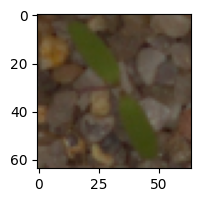

1/1 [==============================] - 0s 140ms/step
Predicted Label ['Fat Hen']
True Label Fat Hen


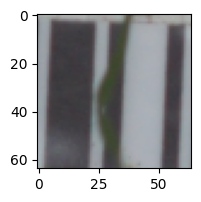

1/1 [==============================] - 0s 74ms/step
Predicted Label ['Black-grass']
True Label Black-grass


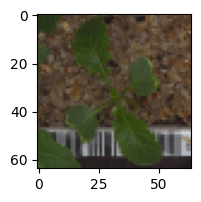

1/1 [==============================] - 0s 33ms/step
Predicted Label ['Charlock']
True Label Charlock


In [128]:
# Visualizing the predicted and correct label of images from test data
plt.figure(figsize=(2,2))
plt.imshow(X_test[2])
plt.show()
print('Predicted Label', enc.inverse_transform(model_CNN2_1.predict((X_test_normalized[2].reshape(1,64,64,3)))))   # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[2])                                               # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[33])
plt.show()
print('Predicted Label', enc.inverse_transform(model_CNN2_1.predict((X_test_normalized[33].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[33])                                              # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[36])
plt.show()
print('Predicted Label', enc.inverse_transform(model_CNN2_1.predict((X_test_normalized[36].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[36])                                              # using inverse_transform() to get the output label from the output vector

## Conclusion and key takeaways
- We can observe from the confusion matrix of all the models, the model with Augmented data and 128 filters in the input layer works best  comapred to all other models. Majority of the classes are better identified by this model.
- Model has 339,868 trainable parameters and after running 20 epochs we were able to achieve ~73% accuracy.
- The test accuracy of this model is 73% which is not far from training and validation accuracy. Which means this model is not overfit and may perform better with unknown data. 
- Data Augmentation helped improving the model to great extent.
- Simply employing the transfer learning model did not produced better outcome than other CNN models. So VGG16 model did not helped for this use case. 

## Scope of Improvement
- These models can be further improved by training with different filter sizes and different number of filters. 
- These models can also be trained on the original image_size i.e 128 x 128 rather than being reduced to 64. Though this will require better hardware.
- Data Augmentation can be performed more and dropout_rate can be changed to improve the model performance.
- Other Transfer Learning architectures can also be used to train the CNN model and these models can be used for classification.